# Monday Oct 9

Recursive practice:
    - Recursive Sum
    - Recursive Min
    - Recursive Reverse
    - Recursive Linear Search
    - Recursive Selection Sort
    - Recursive Power
    

## Example:  Recursive power

Compute base^exponent

3^6 = 3*3*3*3*3*3

3^6 = 3*3^5
    = 3*3*3^4

In exponentiation, what's the base case?

Try this base case:  if exponent = 2, then return base*base




In [5]:
def power(base, exp):
    """ input:  exp is some integer (>=2), base is another integer
    """
    if exp == 2:
        return base*base
    else:
        return( base*power(base, exp-1 ))
        

In [6]:
3*3*3*3

81

In [7]:
power(3, 4)

81

In [10]:
def power2(base, exp):
    """ input:  exp is some integer (>=1), base is another integer
    """
    if exp == 1:
        return base
    else:
        return( base*power(base, exp-1 ))

In [11]:
power2(3,4)

81

In [12]:
def power3(base, exp):
    """ input:  exp is some integer (>=1), base is another integer
    """
    if exp == 0:
        return 1
    else:
        return( base*power(base, exp-1 ))

In [13]:
power3(3,4)

81

## Example: Recursive Reverse

Input:  a string  (ex: "this")
Output: the string in reverse order. (ex: "siht")

Base case?
Recursive step?




Greg's Idea:

In [14]:
def reverse(phrase):
    if len(phrase) == 0:
        return ""
    else:
               #last element + reverse others
        return phrase[-1] + reverse(phrase[0:-1])

In [15]:
reverse("test")

'tset'

## Recursive Min

Write a function that finds the minimum element of a list of numbers, WITHOUT using the built-in min function.


Input:  list of numbers  (Ex: [3, 2, 5, 8])
Output: INDEX of the minimum value (Ex:  return 1)


Assume that the input is at least length 2.


Base case:  need to compare two numbers.  

If there are only two numbers, then the min is the smaller one. 
  - If a <= b, then a is the minimum
  - else, b is the minimum




In [ ]:
def minimum(numbers):
    if len(numbers==2):
        if numbers[0]<=numbers[1]:
            return(0)     #first is smaller, return it
        else:
            return(1)     #second is smaller, return it
    
    

In [33]:
def mimm(numbers):
    
    if len(numbers==0):
        return(0)
    
    elif len(numbers==1):
        return(1)
    elif len(numbers==2):
        if numbers[0]<=numbers[1]:
            return(0)     #first is smaller, return it
        else:
            return(1)     #second is smaller, return it
    else:
        return(    mimm( numbers[1:-1] ) + 1   )
    

In [31]:
myNumbers = [2, 3, 4, 5, 1, 8, 9, 4]

In [32]:
len(myNumbers)

8

# Wed Nov 9

Let's look at a couple of cool recurions examples.

First:  Recursive sort.  This time:  "selection sort".  Ie, we'll sort by first finding the smallest element, swapping it to the beginning of the list, and then recurively sorting the next elements of the list.

[4 1 5 2]

First:

1 is min, sort [1 4 5 2]

2 is min, sort [4 5]

Base case:  if len(numbers) == 1, then we're done.  Just return the numbers.


Otherwise:

 - find the minimum value (here, use built-in function)
 - swap the first element and the minimum element
 - return the min element joined with the sorted output of everything else



In [1]:
def recSort(numbers):
    """
    input:  "numbers" is a list of numbers
    """
    
    if len(numbers)==1:
        return(numbers)
    
    minValue =  min(numbers)              # what's the smallest number?
    minIndex =  numbers.index(minValue)   # where is it?
    
    numbers[minIndex] = numbers[0]        # move the first element to the location of the smallest
    numbers[0] = minValue                 # move the minValue to the beginning
    
    return( [minValue] + recSort(  numbers[1:])  )
    
    
    

In [3]:
recSort( [4, 1, 5, 2, 8, 13, -1, 5] )

[-1, 1, 2, 4, 5, 5, 8, 13]

In [37]:
l1+l2

[1, 2, 3, 4, 5, 6]

# Guessing Passwords

Suppose we want to guess a password by trying all possible combos of characters.

Pretend:  password has length 2, and the only possible characters are A,B,C:

Length 1:  

A
B
C

Length 2:

AA
AB
AC
BA
BB
BC
CA
CB
CC

Length 3:

AAA
AAB
AAC
ABA
ABB
...




Base case:  if length of password = 0, there's only one possiblitiy:  ""

Recursive step:

- Find all possible shorter passwords of length-1
- For each one, append each possible character

for character in characters:
   for password in shorterPasswords:
      (glue them together)




In [7]:
def passwords(length, characters):
    """
    Inputs:
        length = length of password
        characters = string continaing all possible symbols to be used
    Output:
        passwordList = list of all possible passwords
    """
    
    if length==0:          #BASE CASE!!
        return [""]
    
    shorterPasswords = passwords(length-1, characters)  # RECURSIVE STEP!
    
    passwordList = []   #accumulator for passwords
    
    for character in characters:
        for password in shorterPasswords:
            passwordList.append(  password+character  )
            
    return passwordList
    
    
    

In [11]:
len(passwords(4, "ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

456976

# Ch 11 - Organizing Data

Searching and sorting!

To develop "good" sorting/searching algorithms, we NEED to think about algorithm complexity!  How many elementary steps must be executed for a particular input?


Start with search.  We've already written basic searching algorithms.  It's called "linear search".


Look at each element until you find the one you want!



In [14]:
def linSearch(stuff, target):
    n = len(stuff)
    
    for i in range(n):
        if stuff[i] == target:
            return i
    
    

In [15]:
linSearch([1, 2, 3, 4, 5, 6], 3)

2

Question:  say the input list to be searched has length n.  Worst case scenario:  we have make n elementary operations!  

We measure the efficiency of algorithms by the WORST CASE SCENARIO:  for an input of size n, how many elementary computations MIGHT occur?


"Big Oh" notiation.  Ie, the order of magnitude.  We find a function to describe this worst-case scenario.

For linear search:

     O(n)
  
Question:  can we do better?  Answer:  oftentimes!

Example:  spell checkers.  In order for software to "spell-check" your work, it has to examine each word you write, and then find it (or not) in "dictionary file", a list of all words.

If we did a linear search, this gets really slow!  In English, there are about 300,000 words!!

Let's use the fact that dictionary files are SORTED!  

"Binary search" is an efficient algorithm for this scenario.    Consider a simpler case:  search a SORTED list of numbers (instead of words)

Let's first write an iterative algorithm for binary search.


In [33]:
def binSearch(keys, target):
    """
    Input:
        keys is list of numbers to be searched
        target the number we're looking for
        
    Output:
        index of keys containing "target"
    """
    
    left = 0               #the index of the first element of keys
    right = len(keys)-1   #the index of the last element of keys
    runcount = 0
    
    while left <= right:
        
        runcount += 1
        mid = (left+right)//2  #"average", using the floor function for interger
        
        if target < keys[mid] :       # target is less than value at mid index
            right = mid-1
        elif target > keys[mid] :       # target is larger, look at right half!
            left = mid+1
        else:
            print("Number of cycles: ", runcount)
            return mid        # we've found it!  the target is in the "mid" index
        
    return -1   #failure mode -- didn't find the target
    
    


In [35]:
binSearch([13, 14, 15, 16, 17, 18, 19], 22)

-1

# Monday Nov 16

*Textbook: 11.1-11.2*

How efficient is binary search?

Recall, we saw that linear search has efficiency O(n).  If the input has size n, it could take n operations (in the worst case) to search.

What about binary?

Let's imagine, for specific n, what's the worst case?

n = 1:  At most 1 comparison is required.
n = 2:  At most 2 comparisons
n = 4:  At most 3 comparisons
n = 8:  At most 4 comparison
n = 16: At most 5 comparisons
Input is size 2^n, at most n+1 operations.



Since, when our input size increases exponentially our complexity only increases by 1, this **logarithmic** growth!  Opposite of exponential!

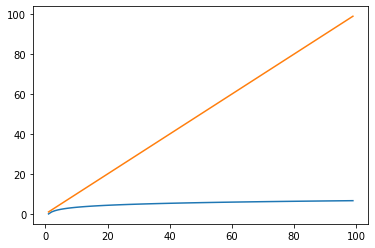

In [14]:
import matplotlib.pyplot as pyplot
import math

# use list comprehensions to plot log
# plot on interval:  x from 1 to 400

#compare this to O(n) = n 

pyplot.plot(  [x for x in range(1,100)], [ math.log2(x) for x in range(1,100)  ]    )
pyplot.plot(  [x for x in range(1,100)], [ x for x in range(1,100)  ]    )



We see that binary search, with O(log(n)) efficiency, is MUCH more efficient!  Above, the red one is linear, the blue one is binary.

Let's practice reucrsion:  write a recursive binary search.

In [29]:
def recBinSearch(keys, target, left, right):
    mid = (left+right)//2
    
    if left>right:
        return -1    #failure mode, element not found
    
    if keys[mid] == target:
        return mid            #we found the index!  base case!
    elif keys[mid] < target:   #need to look at larger values
        return recBinSearch(keys, target, mid+1, right)
    else:
        return recBinSearch(keys, target, left, mid-1)
        

In [22]:
exampleList = [0,1,2,3,4,5,6,7,8,9]

In [23]:
exampleList[9]

9

In [30]:
recBinSearch(exampleList, 10, 0, 9)

-1

# Next time: sorting algorithms

So far, we've studied "selection sort".

In selection sort, at each "step", it coud take the length of the list to find the minimum.  

First step:  n comparisons
2nd:        n-1 comparisons
3rd:        n-2 comparisons
4th:        n-3 comparisons.......


Complexity:  n + n-1 + n-2 + n-3 + .... +1.


Algebra:  the above sum  =  n(n+1)/2 = (1/2)n^2 + (1/2)n


Ex:  10 + 9 + 8 + 7 + 6 + 5 +4 +3 +2 +1 = 10*11/2 = 55